# Project Akhir Pembelajaran Mesin
### Anggota Kelompok:
- Affandra Fahrezi (2110511001)
- Karunia Agustiani (2110511002)
- Regina Faraz Labila (2110511010)
- Muhammad Hykal Nurhakim (2110511024)
- Muhammad Teguh Prananto (2110511036)

## Prediksi Job Applicant

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Membaca Data dan Inspeksi data

In [2]:
df = pd.read_csv('jobapplicant.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [3]:
change_type = {"Employment":object, "Employed":object}
df = df.astype(change_type)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  object 
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 8.4+ MB


### Pilih kolom berdasarkan jenis data dan melihat distribusi data

In [5]:
df['Employed'].value_counts()

1    39392
0    34070
Name: Employed, dtype: int64

In [6]:
category = df.select_dtypes(['object'])
category.drop(['HaveWorkedWith', 'Country'], axis=1, inplace=True)
len(category.columns)

8

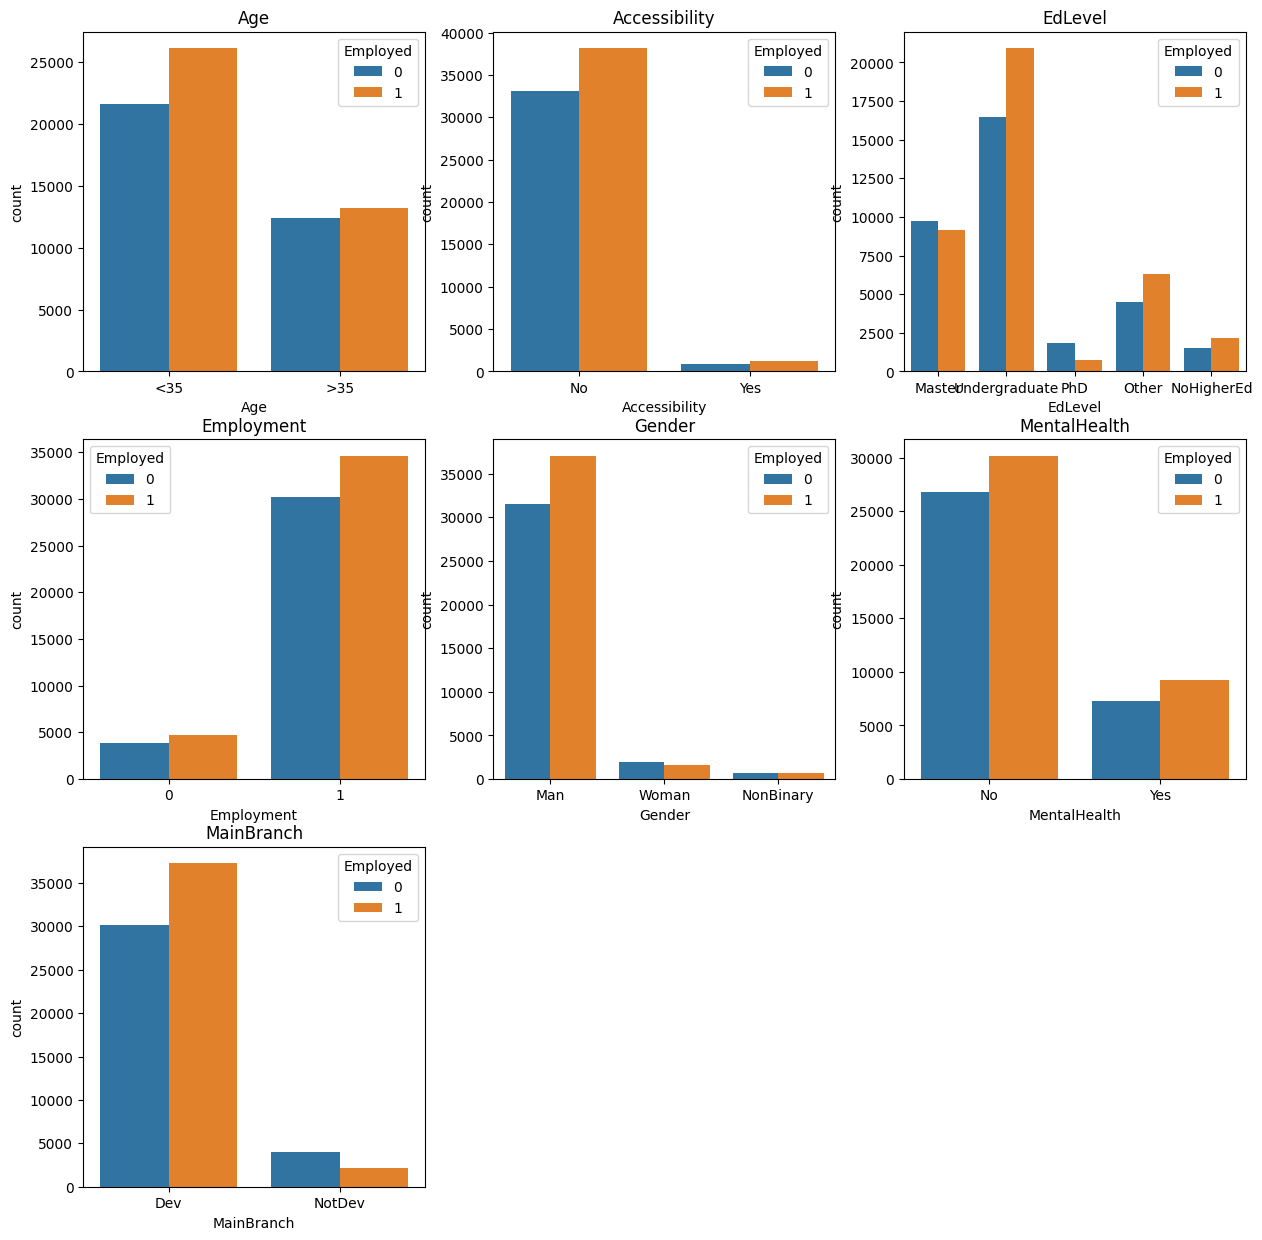

In [7]:
plt.figure(figsize=(15,15))
for i, column in enumerate(category.columns):
    if(column=='Employed'):
        continue
    plt.subplot(3, 3, i+1)
    sns.countplot(x=column, data=category, hue='Employed')
    plt.title(column)


In [8]:
numerik = df.select_dtypes(['int64', 'float64'])
numerik = pd.concat([numerik, df['Employed']], axis=1)
numerik.drop(['Unnamed: 0'], axis=1, inplace=True)

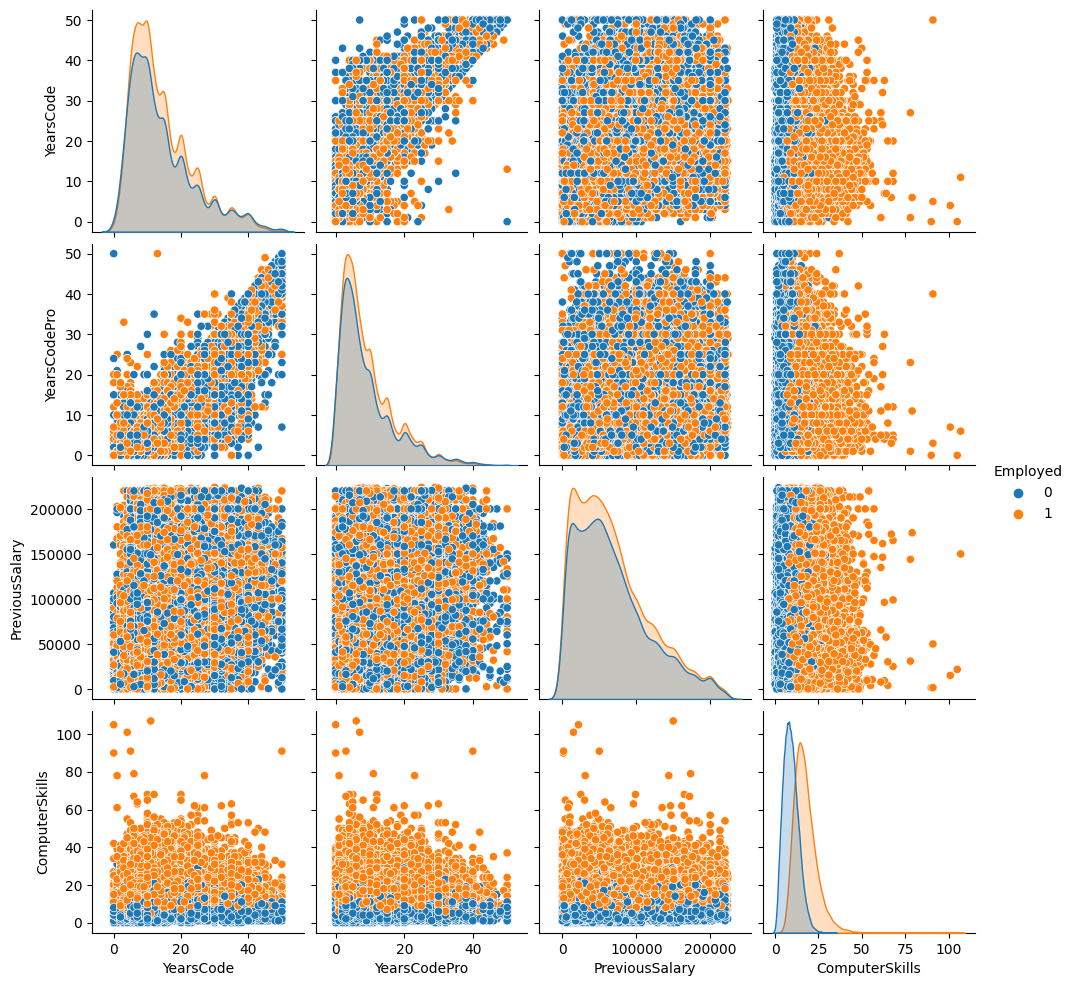

In [9]:
sns.pairplot(numerik, hue='Employed')

### Pilih Kolom yang akan digunakan

In [10]:
df_used = df[['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth',
                   'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills', 'Employed']]
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  object 
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   PreviousSalary  73462 non-null  float64
 10  ComputerSkills  73462 non-null  int64  
 11  Employed        73462 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 6.7+ MB


### Preprocess Data

In [11]:
# Drop Gender == NonBinary
non_binary = df_used[df_used['Gender']=='NonBinary']
df_used.drop(non_binary.index, axis=0, inplace=True)
df_used

C:\Users\muhammadhykal\AppData\Local\Temp\ipykernel_18932\942099569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used.drop(non_binary.index, axis=0, inplace=True)


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,77290.0,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,46135.0,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,160932.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73456,<35,No,Master,1,Man,Yes,Dev,7,5,94000.0,5,0
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,41058.0,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,115000.0,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,57720.0,12,1


### Drop outlier dan Encoding

In [12]:
def remove_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = data[(data[column]<=lower_bound) & (data[column]>=upper_bound)]
    data.drop(outlier.index, axis=0)
    return data


In [13]:
from sklearn.preprocessing import LabelEncoder

# Melakukan teknik encoding pada kolom kategorik
encoder = LabelEncoder()
category = df_used.select_dtypes(['object'])
for column in category.columns:
    category[column] = encoder.fit_transform(category[column])

numerik = df_used.select_dtypes(['int64', 'float64'])
for column in numerik.columns:
    numerik = remove_outlier(numerik, column)

df = pd.concat([numerik,category], axis=1)
df

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,Employed
0,7,4,51552.0,4,0,0,0,1,0,0,0,0
1,12,5,46482.0,12,0,0,4,1,0,0,0,1
2,15,6,77290.0,7,0,0,0,1,0,0,0,0
3,9,6,46135.0,13,0,0,4,1,0,0,0,0
4,40,30,160932.0,2,1,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73456,7,5,94000.0,5,0,0,0,1,0,1,0,0
73457,7,2,41058.0,13,0,0,4,1,0,0,0,1
73458,21,16,115000.0,11,1,0,4,1,0,0,0,1
73459,4,3,57720.0,12,0,0,4,1,0,0,0,1


### Melihat korelasi antar variabel

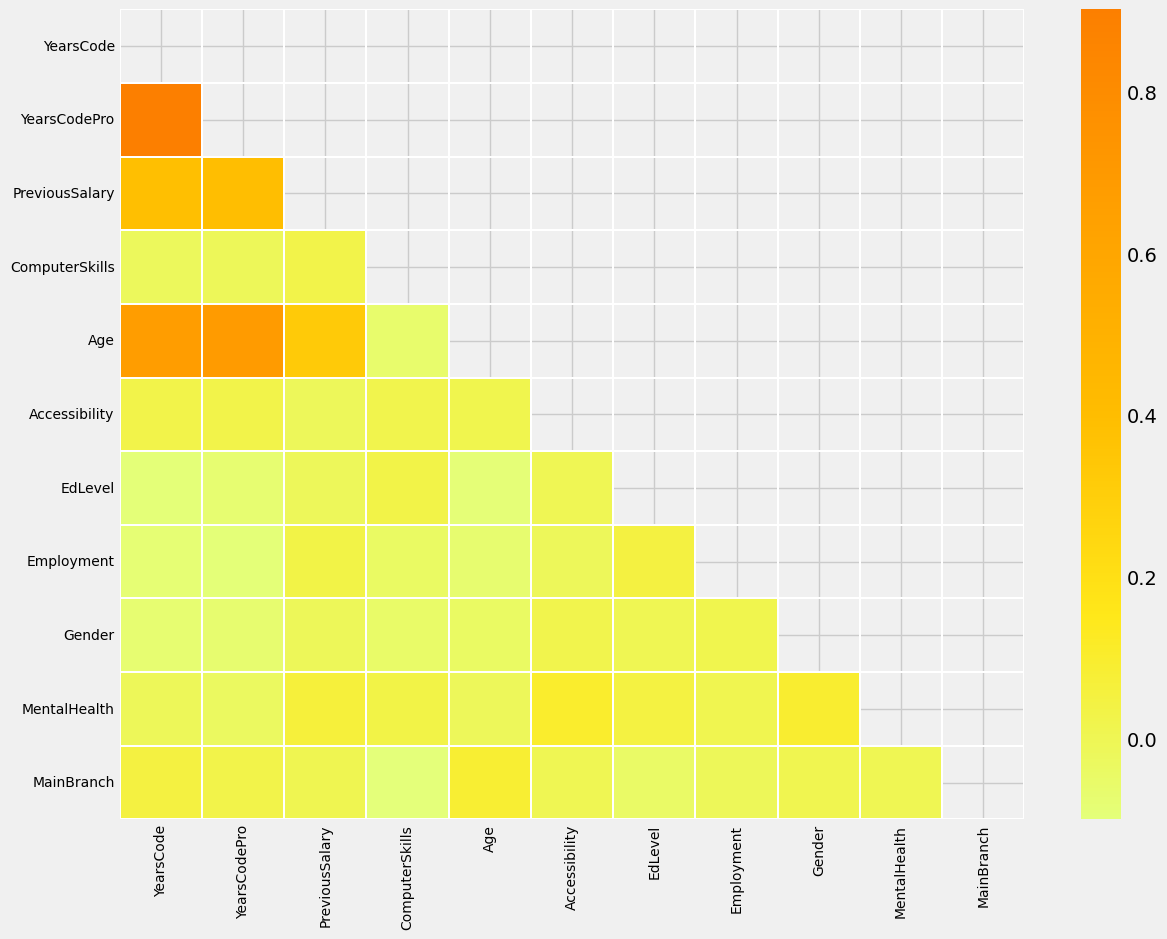

In [14]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.style.use('fivethirtyeight')

corr = df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask=mask, cmap='Wistia', linewidths=.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [15]:
# Memisahkan antara column fitur dan column target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split

#Membagi antara train data 70% dengan test data 30% dari keseluruhan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(50463, 21628)

### Membuat dan Melatih Model Random Forest dengan parameter terbaik

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')

# Mengambil parameter terbaik
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

KeyboardInterrupt: 

In [ ]:
# Train model dengan best parameter
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

### Evaluasi Model Random Forest

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi prediksi data train
y_pred = rf.predict(X_train)
cr = classification_report(y_pred, y_train)
accuracy = accuracy_score(y_pred, y_train)

print(cr)
print(f"Akurasi model mencapai {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.74      0.79      0.77     22000
           1       0.83      0.79      0.81     28463

    accuracy                           0.79     50463
   macro avg       0.79      0.79      0.79     50463
weighted avg       0.79      0.79      0.79     50463

Akurasi model mencapai 0.79


In [ ]:
# Evaluasi prediksi data test
y_pred = rf.predict(X_test)
cr = classification_report(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)

print(cr)
print(f"Akurasi model mencapai {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      9425
           1       0.82      0.79      0.81     12203

    accuracy                           0.79     21628
   macro avg       0.78      0.79      0.78     21628
weighted avg       0.79      0.79      0.79     21628

Akurasi model mencapai 0.79


### Membuat dan Melatih Model MLP

In [ ]:
# Menerapkan Standar Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
input_shape = (X.shape[1],)

learning_rates = [0.001, 0.01, 0.1]

results= []

best_accuracy = 0
best_model = None

# Melatih model dengan learning rate tertentu
for lr in learning_rates:
  # Model MLP
  mlp = Sequential([
       Dense(14, activation='relu', input_shape=input_shape),
       Dropout(0.5),
       Dense(8, activation='relu'),
       Dropout(0.5),
       Dense(1, activation='sigmoid')
   ])

  optimizer = keras.optimizers.Adam(learning_rate=lr)
  mlp.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  # Melatih model mlp
  print("\nLearning Rate:", lr)

  # Inisialisasi EarlyStopping callback
  early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True, start_from_epoch=25)

  # Melatih model mlp
  mlp.fit(X_train_scaled, y_train, epochs=50, verbose=1, callbacks=[early_stopping])

  # Melakukan prediksi pada data pengujian
  y_pred = mlp.predict(X_test_scaled)
  y_pred = (y_pred > 0.5)

  # Menghitung akurasi dan menyimpan hasil ke daftar
  accuracy = accuracy_score(y_test, y_pred)
  results.append({'Learning Rate': lr, 'Accuracy': accuracy})

  # Melacak model dengan akurasi tertinggi
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = mlp



Learning Rate: 0.001
Epoch 1/50
1577/1577 [==============================] - 7s 4ms/step - loss: 0.5891 - accuracy: 0.6787
Epoch 2/50
1577/1577 [==============================] - 5s 3ms/step - loss: 0.5106 - accuracy: 0.7578
Epoch 3/50
1577/1577 [==============================] - 6s 4ms/step - loss: 0.5028 - accuracy: 0.7641
Epoch 4/50
1577/1577 [==============================] - 5s 3ms/step - loss: 0.4973 - accuracy: 0.7652
Epoch 5/50
1577/1577 [==============================] - 6s 4ms/step - loss: 0.4912 - accuracy: 0.7654
Epoch 6/50
1577/1577 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.7643
Epoch 7/50
1577/1577 [==============================] - 6s 4ms/step - loss: 0.4911 - accuracy: 0.7632
Epoch 8/50
1577/1577 [==============================] - 5s 3ms/step - loss: 0.4914 - accuracy: 0.7636
Epoch 9/50
1577/1577 [==============================] - 6s 4ms/step - loss: 0.4901 - accuracy: 0.7636
Epoch 10/50
1577/1577 [==============================] - 5s 

In [ ]:
# Menampilkan hasil akurasi
results_df = pd.DataFrame(results)
results_df

,Learning Rate,Accuracy
0,0.001,0.785325
1,0.010,0.784492
2,0.100,0.540549


### Evaluasi Model MLP

676/676 [==============================] - 1s 2ms/step


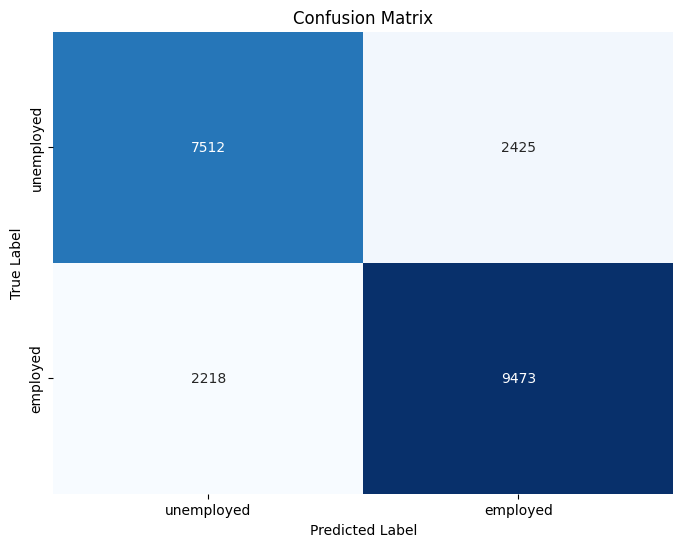

In [ ]:
# Membuat confusion matrix
y_pred = best_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['unemployed', 'employed'],
            yticklabels=['unemployed', 'employed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print("Classification Report\n", cr)
print("\nAkurasi model:", accuracy_score(y_pred, y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      9937
           1       0.80      0.81      0.80     11691

    accuracy                           0.79     21628
   macro avg       0.78      0.78      0.78     21628
weighted avg       0.79      0.79      0.79     21628


Akurasi model: 0.7853245792491215


### Membuat dan Melatih Model XGBoost

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [85]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Inisialisasi model XGBoost
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y)), learning_rate=0.01)

# Latih model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [88]:
# Melakukan prediksi
y_pred = model.predict(X_train)

# Evaluasi akurasi
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

Accuracy: 0.7867942849216257
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     26808
           1       0.78      0.83      0.81     30864

    accuracy                           0.79     57672
   macro avg       0.79      0.78      0.78     57672
weighted avg       0.79      0.79      0.79     57672



In [89]:
# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7898606005964353
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6622
           1       0.79      0.83      0.81      7797

    accuracy                           0.79     14419
   macro avg       0.79      0.79      0.79     14419
weighted avg       0.79      0.79      0.79     14419

